# Inverse distance weighting - Meuse Dataset

https://pareekshithkatti.medium.com/inverse-distance-weighting-interpolation-in-python-68351fb612d2

Python package: https://github.com/yahyatamim/pyidw

IDW based on paper: https://colab.research.google.com/github/caiociardelli/sphglltools/blob/main/doc/9_Inverse_distance_weighting.ipynb#scrollTo=yM5SAdS8Sunj

IDW with youtube video:
https://github.com/adenarayana/Python-Matplotlib/blob/main/008_IDWInterpolation/008_IDWInterpolation.ipynb

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipdw

In [2]:
df = pd.read_csv("meuse_processed.csv")

In [3]:
display(df)

,x,y,cadmium,copper,lead,zinc,elev,dist,om,ffreq,soil,lime,landuse,dist.m
0,181072,333611,2.459589,4.442651,5.700444,6.929517,7.909,0.001358,13.6,1,1,1,Ah,50
1,181025,333558,2.151762,4.394449,5.624018,7.039660,6.983,0.012224,14.0,1,1,1,Ah,30
2,181165,333537,1.871802,4.219508,5.293305,6.461468,7.800,0.103029,13.0,1,1,1,Ah,150
3,181298,333484,0.955511,4.394449,4.753590,5.549076,7.655,0.190094,8.0,1,2,0,Ga,270
4,181307,333330,1.029619,3.871201,4.762174,5.594711,7.480,0.277090,8.7,1,2,0,Ah,380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,179184,330182,-0.223144,2.995732,3.891820,5.111988,8.128,0.423837,4.7,3,1,0,Am,540
151,179085,330292,1.131402,3.663562,5.153292,6.206576,8.577,0.423837,9.1,3,1,0,Ah,520
152,178875,330311,0.741937,3.433987,4.779123,5.834811,8.429,0.277090,6.5,3,1,0,Ah,350
153,179466,330381,-0.223144,3.044522,3.931826,5.087596,9.406,0.358606,5.7,3,1,0,W,460


In [4]:
interpolate_data = pd.DataFrame({
    'x': df['x'],
    'y': df['y']
})

In [5]:
interpolate_data

,x,y
0,181072,333611
1,181025,333558
2,181165,333537
3,181298,333484
4,181307,333330
...,...,...
150,179184,330182
151,179085,330292
152,178875,330311
153,179466,330381


In [36]:
# Assuming you have the meuse dataset loaded as a DataFrame named df
x_min, y_min, x_max, y_max = df['x'].min(), df['y'].min(), df['x'].max(), df['y'].max()

# Define the boundary based on min and max coordinates
boundary = [[x_min, y_min], [x_min, y_max], [x_max, y_max], [x_max, y_min], [x_min, y_min]]  # Closed polygon

# Assuming there are no internal holes in the domain
holes = []

In [45]:
cellsize = 1
# Initialize the Gridded object
grid = ipdw.Gridded(cellsize, boundary)

In [46]:
# Prepare input data for interpolation
input_locations = df[['x', 'y']].values.tolist()  # Convert DataFrame columns to a list of [x,y] pairs
input_values = df['zinc'].tolist()  # Zinc concentration values

# Perform interpolation
output = grid.interpolate(input_locations, input_values, n_nearest=3, power=1, buffer = 1, allow_outside= True)

KeyboardInterrupt: 

In [39]:
output_df = pd.DataFrame(output)
display(output_df)

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,7.082139,7.082188,7.082239,7.082292,7.082347,7.082404,7.082463,7.082524,7.082587,...,6.310541,6.263241,6.220150,6.183779,6.154401,6.132344,5.839290,5.828894,5.822490,NaN
2,NaN,7.082075,7.082124,7.082175,7.082228,7.082283,7.082340,7.082399,7.082460,7.082523,...,6.288245,6.228945,6.176263,6.134251,5.851632,5.829758,5.816058,5.808586,5.805262,NaN
3,NaN,7.082008,7.082057,7.082108,7.082161,7.082216,7.082274,7.082333,7.082394,7.082458,...,6.261261,6.183667,5.932786,5.889416,5.815975,5.796693,5.787596,5.785258,5.786520,NaN
4,NaN,7.081940,7.081989,7.082040,7.082093,7.082148,7.082205,7.082265,7.082326,7.082390,...,6.058114,5.957008,5.882038,5.833904,5.767417,5.754693,5.754370,5.760084,5.767455,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,NaN,6.378703,6.401287,6.428291,6.461135,6.501865,6.553382,6.619180,6.633571,6.631680,...,6.508531,6.510895,6.513207,6.515466,6.517673,6.519826,6.521926,6.523973,6.525968,NaN
192,NaN,6.380795,6.402694,6.428535,6.459311,6.496045,6.552795,6.592536,6.622395,6.619868,...,6.510505,6.512743,6.514938,6.517088,6.519193,6.521252,6.523264,6.525229,6.527149,NaN
193,NaN,6.380220,6.400593,6.423991,6.450695,6.499761,6.525923,6.548588,6.559211,6.553750,...,6.512522,6.514635,6.516714,6.518756,6.520760,6.522724,6.524649,6.526532,6.528375,NaN
194,NaN,6.377110,6.395284,6.442392,6.460151,6.478420,6.495099,6.506536,6.508755,6.501898,...,6.514574,6.516565,6.518529,6.520463,6.522367,6.524238,6.526074,6.527876,6.529642,NaN


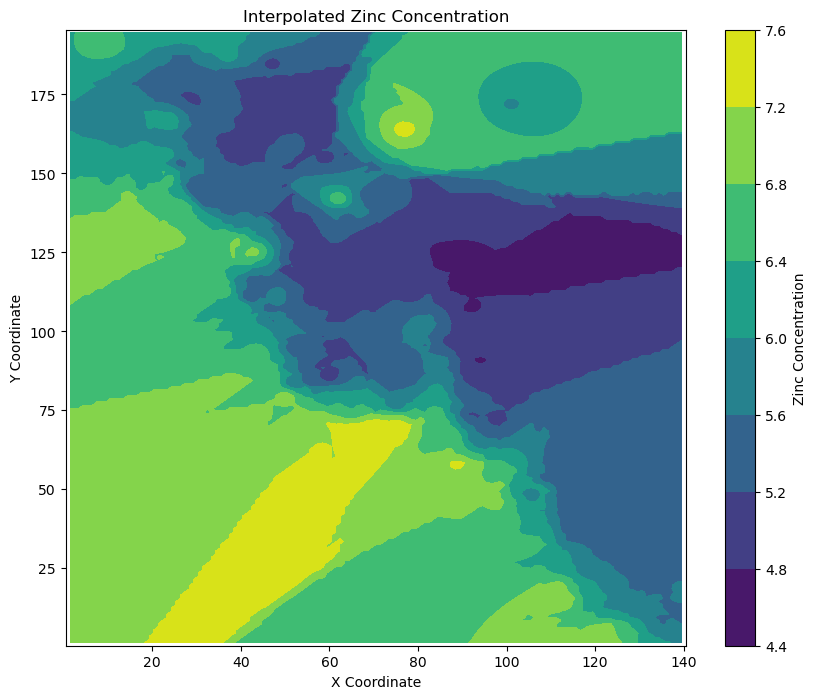

In [40]:
import matplotlib.colors as mcolors

# Assuming 'output' is your 2D array from the IDW interpolation
# First, let's check if 'output' needs any preprocessing
# If 'output' is not a numpy array, convert it
if not isinstance(output, np.ndarray):
    output = np.array(output)

# Plot the interpolated results
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Use a colormap to represent the zinc concentration
# 'viridis' is a good default choice, but you can use others like 'jet', 'coolwarm', etc.
cmap = plt.get_cmap('viridis')

# Create a color map that includes NaN values (e.g., for areas outside the interpolation domain)
# Set NaN values to a specific color, such as 'lightgrey'
cmap.set_bad('lightgrey')


# Mask NaN values for better color mapping
masked_output = np.ma.masked_invalid(output)

# Plot the data with a color map
plt.contourf(masked_output, cmap=cmap, origin='lower')

# Adding a color bar to interpret the values
cbar = plt.colorbar()
cbar.set_label('Zinc Concentration')

# Adding labels and title if desired
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Interpolated Zinc Concentration')

# Display the plot
plt.show()

TypeError: Dimensions of C (196, 141) should be one smaller than X(140) and Y(195) while using shading='flat' see help(pcolormesh)

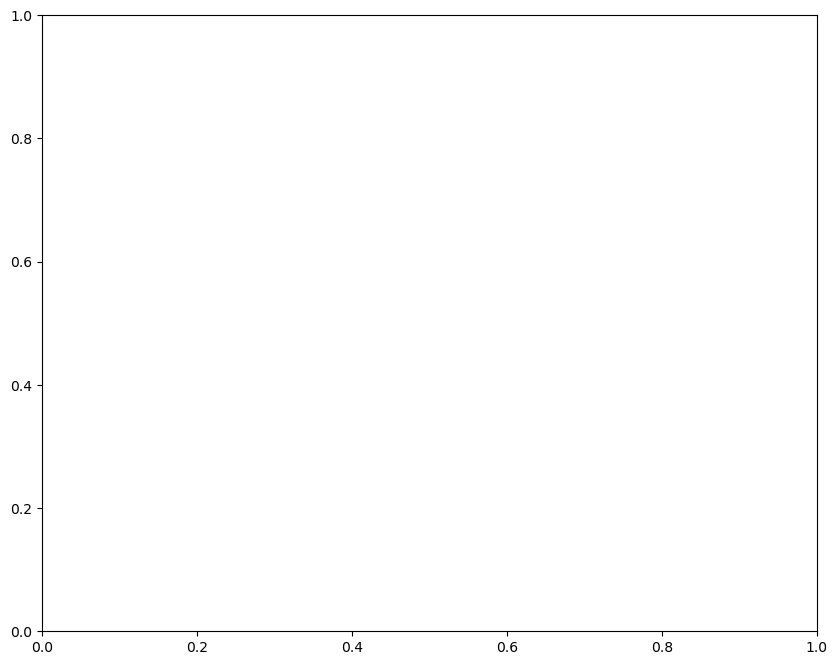

In [44]:

# Given vector array 'output' and the boundary
x_min, y_min, x_max, y_max = df['x'].min(), df['y'].min(), df['x'].max(), df['y'].max()
cellsize = 20  # or whatever cellsize you've used for interpolation

# Create a meshgrid for the x and y coordinates
x_range = np.arange(x_min, x_max, cellsize)
y_range = np.arange(y_min, y_max, cellsize)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)

# Assuming 'output' is your interpolated 2D numpy array
# Ensure 'output' dimensions match 'x_mesh' and 'y_mesh'; adjust 'cellsize' or interpolation grid as necessary

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the interpolated surface using pcolormesh
cmap = plt.get_cmap('viridis')  # Colormap
pc = ax.pcolormesh(x_mesh, y_mesh, output, shading='auto', cmap=cmap)

# Add a colorbar to the plot to show the zinc concentration levels
cbar = fig.colorbar(pc, ax=ax)
cbar.set_label('Zinc Concentration')

# Plot the actual data points on top
scatter = ax.scatter(df['x'], df['y'], c=df['zinc'], cmap=cmap, edgecolor='black', label='Actual Data Points')

# Add a legend for the actual data points
legend1 = ax.legend(*scatter.legend_elements(), title="Zinc Values")
ax.add_artist(legend1)

# Setting the plot titles and labels
ax.set_title('IDW Interpolation of Zinc Concentration with Actual Data Points')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Show the plot
plt.show()



In [28]:
observed_location_columns = ['x', 'y']
observed_values_column = 'zinc'
observed_locations = df[observed_location_columns].values
observed_values = df[observed_values_column].values

x_min, x_max = observed_locations[:, 0].min() - 1, observed_locations[:, 0].max() + 1
y_min, y_max = observed_locations[:, 1].min() - 1, observed_locations[:, 1].max() + 1
x_range = np.linspace(x_min, x_max, 150)
y_range = np.linspace(y_min, y_max, 150)
x_grid, y_grid = np.meshgrid(x_range, y_range)
grid_points = np.c_[x_grid.ravel(), y_grid.ravel()]

# Find nearest neighbors for the grid points
#distances, indices = nn_model.kneighbors(grid_points)

# Interpolate values
#interpolated_values = np.mean(observed_values[indices], axis=1)
z_grid = output.reshape(x_grid.shape)

end_time_interpolation = time.time()  # End timing spatial interpolation

# Visualization
plt.figure(figsize=(10, 7))
plt.contourf(x_grid, y_grid, z_grid, cmap='viridis', levels=100)
plt.colorbar(label='Interpolated Zinc Levels')
plt.scatter(df['x'], df['y'], c=df['zinc'], cmap='viridis', edgecolor='k', label='Observed')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.title('Interpolated Zinc Levels Across the Area')
plt.show()


ValueError: cannot reshape array of size 27636 into shape (150,150)

In [7]:
# Calculate Euclidean distance between two points
def distance(x1, x2, y2, y1):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [8]:
type(interpolate_data['x'][0])

numpy.int64

In [9]:
# list of velocity from IDW
vIDW = []

for i in range(len(interpolate_data)):
    
    #=========get the distance: the closest 5 points=========#
    
    nPoints = 5 # number of points
    dList = []
    
    for j in range(len(meuse_df)):
        dist = distance(interpolate_data['x'][i], meuse_df['x'][j], interpolate_data['y'][i], meuse_df['y'][j])
        dList.append(dist) 
        
    dListDF = pd.Series(dList)
    dListDF.sort_values(ascending=True, inplace=True)
    dListDF = dListDF[0:nPoints]
    
    #=========check the distance=========#
    
    if dListDF.iloc[0] <= 1: # if the distance from interpolation point less than equal to 1 meter
        
        vIDW.append(meuse_df['mag'][dListDF.index.values[0]])
        
    else:    
    #=========IDW=========#    
        
        # get the velocity data: the closest 5 data
        
        vZinc = []
        for idx in dListDF.index.values:
            vZinc.append(meuse_df['zinc'][idx])
        vZinc = np.array(vZinc)

        # weight calculation
        
        p = 2                     # power parameter
        wList = []
        for d in dListDF:
            wList.append(1/d**p) 
        wList = np.array(wList)

        # IDW
        
        vIDW.append(np.dot(vZinc,np.transpose(wList))/np.sum(wList)) 

# final result
vIDW = np.array(vIDW)

In [10]:
vIDW

array([6.92705104, 5.08837336, 5.78798962])

InvalidIndexError: (slice(None, None, None), 0)

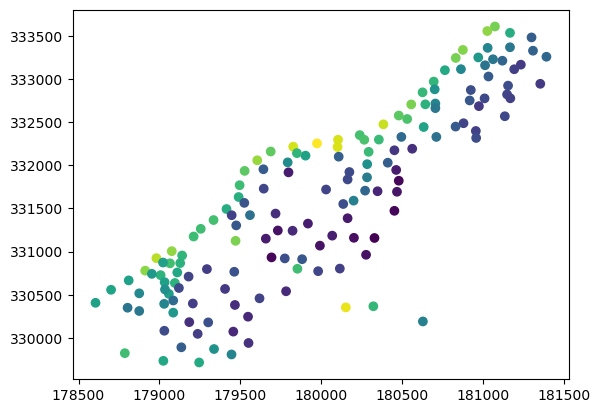

In [11]:
# Plotting for visualization
plt.scatter(meuse_df['x'], meuse_df['y'], c=meuse_df['zinc'], cmap='viridis', label='Observed')
plt.scatter(interpolate_data[:, 0], interpolate_data[:, 1], c=vIDW[:, 0], cmap='viridis', marker='x', s=100, label='Interpolated')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.show()

In [22]:
i = 0 # 
nPoints = 5 # number of points
dList = []

for j in range(len(meuse_df)):
    dList.append(distance(interpolate_data['x'][i], 
                          meuse_df['x'][j],
                          interpolate_data['y'][i], 
                          meuse_df['y'][j])) 

dListDF = pd.Series(dList)
dListDF.sort_values(ascending=True, inplace=True)
dListDF = dListDF[0:nPoints]


In [23]:
dListDF

0      7.280110
1     77.466122
2    121.827747
7    259.295199
3    261.021072
dtype: float64

In [24]:
meuse_df.iloc[dListDF.index.values]

,x,y,cadmium,copper,lead,zinc,elev,dist,om,ffreq,soil,lime,landuse,dist.m
0,181072,333611,11.7,85,299,1022,7.909,0.001358,13.6,1,1,1,Ah,50
1,181025,333558,8.6,81,277,1141,6.983,0.012224,14.0,1,1,1,Ah,30
2,181165,333537,6.5,68,199,640,7.800,0.103029,13.0,1,1,1,Ah,150
7,181027,333363,2.8,29,150,406,8.490,0.092152,9.5,1,1,0,Ab,120
3,181298,333484,2.6,81,116,257,7.655,0.190094,8.0,1,2,0,Ga,270


In [25]:
if dListDF.iloc[0] <= 1: # if the distance from interpolation point less than equal to 1 meter

    meuse_df['zinc'][dListDF.index.values[0]]
    print(True)

else:
    
    print(False)

False


In [27]:
#=========IDW=========#    

# get the velocity data: the closest 5 data

vZinc = []
for idx in dListDF.index.values:
    vZinc.append(meuse_df['zinc'][idx])
vZinc = np.array(vZinc)

# weight calculation

p = 2                     # power parameter
wList = []
for d in dListDF:
    wList.append(1/d**p) 
wList = np.array(wList)

# IDW

np.dot(vZinc,np.transpose(wList))/np.sum(wList)

1020.6254088301395

In [20]:
import numpy as np

def inverse_distance_weighting(x, y, z, x_new, y_new, power=2):
    """
    Perform Inverse Distance Weighting interpolation.

    Parameters:
    - x: array of x-coordinates of the known points.
    - y: array of y-coordinates of the known points.
    - z: array of values at the known points.
    - x_new: x-coordinate of the point for which to estimate the value.
    - y_new: y-coordinate of the point for which to estimate the value.
    - power: power parameter that controls the influence of distance on the interpolation. Higher values give more influence to closer points.

    Returns:
    - Estimated value at (x_new, y_new).
    """
    distances = np.sqrt((x - x_new)**2 + (y - y_new)**2)
    # Prevent division by zero for points exactly at the location of interest
    distances = np.where(distances == 0, 1e-10, distances)
    weights = 1 / distances**power
    weighted_sum = np.sum(weights * z)
    sum_of_weights = np.sum(weights)
    z_new = weighted_sum / sum_of_weights
    return z_new

# Example usage
x = meuse_df['x']  # x-coordinates of known points
y = meuse_df['y']  # y-coordinates of known points
z = meuse_df['zinc'] # Values at known points

for idx in range(len(interpolate_data['x'])):
    x_new = interpolate_data['x'][idx]  # x-coordinate of the point for estimation
    y_new = interpolate_data['y'][idx] # y-coordinate of the point for estimation

    # Estimate value at new point
    z_new = inverse_distance_weighting(x, y, z, x_new, y_new, power=2)
    print(f"Estimated value at ({x_new}, {y_new}): {z_new}")


Estimated value at (181074, 333618): 6.9204491382885305
Estimated value at (179463, 330389): 5.099597202772105
Estimated value at (182080, 333718): 5.878118963592749
